<a href="https://colab.research.google.com/github/6FAN/Amazon-Product-Reviews-NLP/blob/main/Amazon_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

* 01: Importing Some Necessary Libraries
* 02: Preprocessing
* 03: Apply Function
* 04: Punctuations and Stopwords
* 05: Vectorization
* 06: Working on Naive Bayes Theoram
* 07: Access The model Performance Using Confusion Matrix
* 08: Confusion Matrix
* 09: Classification Report

# 01: Importing Some Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_theme("paper")

import nltk

# 02: Preprocessing

In [ ]:
#Load dataset
df = pd.read_csv("DataSet/amazon.csv")
df

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19991,this app is fricken stupid.it froze on the kin...,0
19992,Please add me!!!!! I need neighbors! Ginger101...,1
19993,love it! this game. is awesome. wish it had m...,1
19994,I love love love this app on my side of fashio...,1


**Label**
* 0 is a Negative Reviews
* 1 is a Positive Reviews

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
df.shape

(19996, 2)

In [ ]:
df.columns

Index(['Text', 'label'], dtype='object')

In [ ]:
df.isnull().sum()

Text     0
label    0
dtype: int64

In [ ]:
df.describe()

,label
count,19996.000000
mean,0.761652
std,0.426083
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df['Text']

0        This is  the best apps acording to a bunch of ...
1        This is a pretty good version of the game for ...
2        this is a really . there are a bunch of levels...
3        This is a silly game and can be frustrating, b...
4        This is a terrific game on any pad. Hrs of fun...
                               ...                        
19991    this app is fricken stupid.it froze on the kin...
19992    Please add me!!!!! I need neighbors! Ginger101...
19993    love it!  this game. is awesome. wish it had m...
19994    I love love love this app on my side of fashio...
19995    This game is a rip off. Here is a list of thin...
Name: Text, Length: 19996, dtype: object

In [ ]:
df['Text'][19991]

'this app is fricken stupid.it froze on the kindle and it wont allow me to place most iteams just ignore the 5 * people their wrong on so many levels. the people who made this game so were you excidently press the wrong button you them your own money. jer'

In [ ]:
negative = df[df['label'] == 0]
negative.sample(4)

,Text,label
12019,This was my first attempt to find an alarm tha...,0
6513,"I love puzzle games that make you think., but ...",0
2757,"the moment i click on due date, it crashes. ca...",0
18226,I thought this would be fun but it was so slow...,0


In [ ]:
positive = df[df['label'] == 1]
positive.sample(4)

,Text,label
17862,"Wow, just finished the whole game. It was a cl...",1
5048,"I like the MapQuest, GPS & Traffic because it ...",1
18622,Have just started to play sudoku and this help...,1
15509,This is truly a wonderful app. Not everything ...,1


In [ ]:
df['Text'][4]

'This is a terrific game on any pad. Hrs of fun.  My grandkids love it. Great entertainment when waiting in long lines'

In [ ]:
df['label'].value_counts()

label
1    15230
0     4766
Name: count, dtype: int64

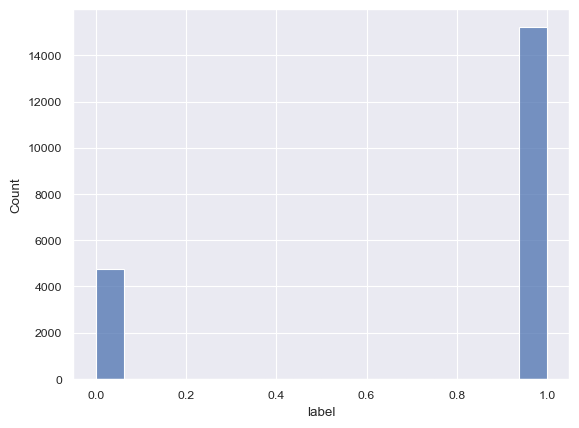

In [ ]:
sns.histplot(data=df, x='label')
plt.show()

Above plot show that more reviews recived **POSITIVELY**

# 03: Apply Function

Creating a 'lenght' column in that lenght of the given reviews

In [ ]:
df['lenght'] = df['Text'].apply(len)
df

,Text,label,lenght
0,This is the best apps acording to a bunch of ...,1,121
1,This is a pretty good version of the game for ...,1,129
2,this is a really . there are a bunch of levels...,1,87
3,"This is a silly game and can be frustrating, b...",1,105
4,This is a terrific game on any pad. Hrs of fun...,1,117
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,254
19992,Please add me!!!!! I need neighbors! Ginger101...,1,185
19993,love it! this game. is awesome. wish it had m...,1,105
19994,I love love love this app on my side of fashio...,1,254


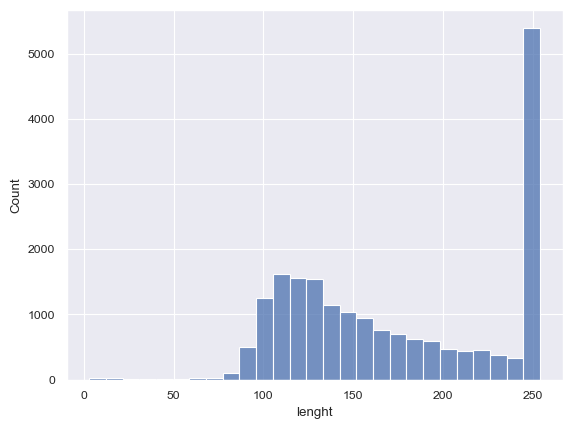

In [ ]:
sns.histplot(data=df, x="lenght")
plt.show()

**We can notice above Chart**
* the reviews lenght 250 above have more than 5000 times

In [ ]:
df.describe()

,label,lenght
count,19996.000000,19996.000000
mean,0.761652,175.787257
std,0.426083,58.964840
min,0.000000,3.000000
25%,1.000000,123.000000
50%,1.000000,164.000000
75%,1.000000,254.000000
max,1.000000,254.000000


**We can notic above**
* Max lenght of Reviews 254
* Min lenght of Reviews 3

In [ ]:
# Let see shortest review
df[df['lenght'] == 3]

,Text,label,lenght
766,fun,1,3
11377,Fun,1,3


# 04: Punctuations and Stopwords

In [ ]:
import string

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopword = stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Removing a Punctuation and Sstopwords
def cleaning(message):
    text_PR = [i for i in message if i not in string.punctuation]
    text_PR_join = ''.join(text_PR)
    text_PR_join = [j for j in text_PR_join.split() if j.lower() not in stopword]
    return text_PR_join

In [ ]:
df_reviws_clean = df['Text'].apply(cleaning)
df_reviws_clean

0        [best, apps, acording, bunch, people, agree, b...
1        [pretty, good, version, game, free, LOTS, diff...
2        [really, bunch, levels, find, golden, eggs, su...
3        [silly, game, frustrating, lots, fun, definite...
4        [terrific, game, pad, Hrs, fun, grandkids, lov...
                               ...                        
19991    [app, fricken, stupidit, froze, kindle, wont, ...
19992    [Please, add, need, neighbors, Ginger1016, tha...
19993    [love, game, awesome, wish, free, stuff, house...
19994    [love, love, love, app, side, fashion, story, ...
19995    [game, rip, list, things, MAKE, BETTERbull, Fi...
Name: Text, Length: 19996, dtype: object

In [ ]:
df_reviws_clean[5]

['entertaining',
 'game',
 'dont',
 'smart',
 'play',
 'guess',
 'thats',
 'like',
 'itits',
 'easy',
 'fun',
 'thats',
 'games',
 'suppose',
 'warned',
 'game',
 'highly',
 'addictive']

# 05: Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vector = CountVectorizer(analyzer=cleaning, dtype=np.uint8)
df_vector = vector.fit_transform(df['Text'])

In [ ]:
df_vector

<19996x28693 sparse matrix of type '<class 'numpy.uint8'>'
	with 318340 stored elements in Compressed Sparse Row format>

In [ ]:
df_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
df_vector.shape

(19996, 28693)

In [ ]:
#With Heading
data = pd.DataFrame(data=df_vector.toarray(), columns=vector.get_feature_names_out())
x = data
x.head()

,0,00,000,000000,007,01302013,02,025cent,04042011,05,...,zoo,zoology,zoom,zoomed,zooming,zpg,zz,zzz,zzzz,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['label']
y

0        1
1        1
2        1
3        1
4        1
        ..
19991    0
19992    1
19993    1
19994    1
19995    0
Name: label, Length: 19996, dtype: int64

In [ ]:
x.shape

(19996, 28693)

In [ ]:
y.shape

(19996,)

# 06: Working on Naive Bayes Theoram

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

# 07: Access The model Performance Using Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Predicting the test data
y_predict = NB_classifier.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
#Predicting the test data set result
y_predict_test = NB_classifier.predict(x_test[0:100])
y_predict_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

# 08: Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print(f'The Confusion Matrix is : ')
print(cm)


The Confusion Matrix is : 
[[ 808  337]
 [ 249 3605]]


* True Positive(TP) = 808
* True Negative(TN) = 3605
* False Positive(FP) = 337
* False Negative(FN) = 249



* The Confusion Matrix Shows 808+3605 = 4413 **Correct Prediction.**
* 337 + 249 = 586 is a **Incorrect Prediction.**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(f'The Accuracy is :{accuracy*100:.2f}%')

The Accuracy is :88.28%


In [ ]:
((808 + 3605) / (808 + 337 + 249 + 3605)) * 100

88.27765553110622

In [ ]:
cm_mat = pd.DataFrame(
    data=cm,
    columns=[
        'Actual Positive : 1',
        'Actual Negative : 0'
    ],
    index=[
        'Predict Positive : 1',
        'Predict Negative : 0'
    ])
cm_mat

,Actual Positive : 1,Actual Negative : 0
Predict Positive : 1,808,337
Predict Negative : 0,249,3605


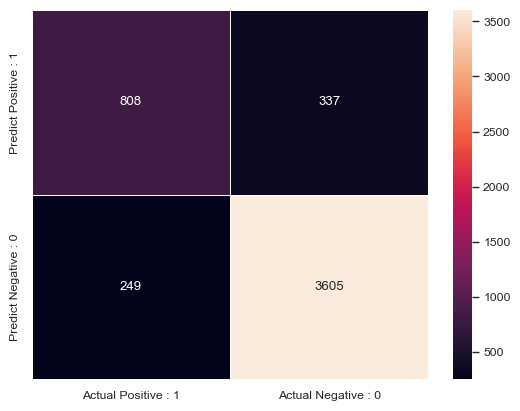

In [ ]:
sns.heatmap(data=cm_mat, annot=True, linewidths=0.5, fmt='d')
plt.show()

# 09: Classification Report

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1145
           1       0.91      0.94      0.92      3854

    accuracy                           0.88      4999
   macro avg       0.84      0.82      0.83      4999
weighted avg       0.88      0.88      0.88      4999

